In [1]:
!pip install gensim matplotlib scikit-learn

In [2]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
!pip install --upgrade numpy
!pip install --upgrade gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  A

In [4]:
# Load a pre-trained word embedding model (Word2Vec)
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [5]:
# Choose a set of words
words = ["king", "queen", "man", "woman", "prince", "princess", "kingdom", "throne", "crown"]

In [11]:
# Get word embeddings
embeddings = np.array([model[word] for word in words])

In [12]:
# Reduce dimensions using t-SNE
#tsne = TSNE(n_components=2, random_state=42)
#embeddings_2d = tsne.fit_transform(embeddings)

In [13]:
tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # Lower perplexity
embeddings_2d = tsne.fit_transform(embeddings)

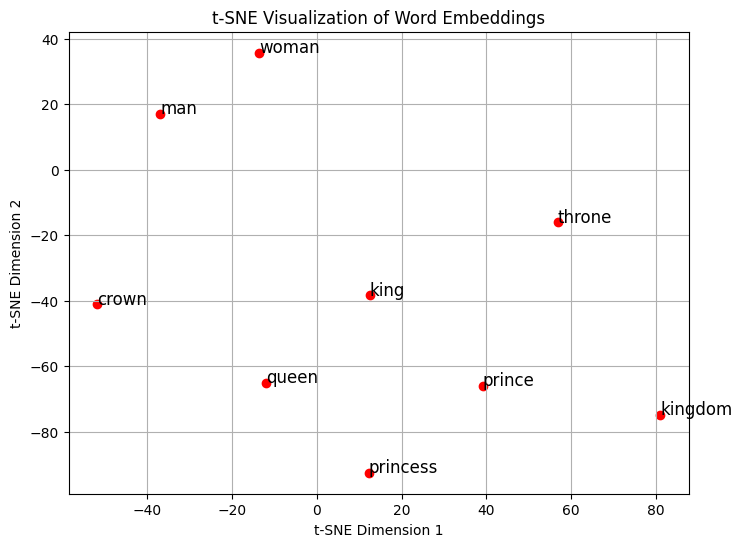

In [14]:
# Plot the word embeddings
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color="red")

# Annotate points
for i, word in enumerate(words):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=12)

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()